<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Student: Nicolas Rehbach
* Matriculation Number: 11133387
* Date:   24.10.2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)

import seaborn as sns

In [2]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    # Define our cut off (when is something an anomaly?)
    # Third quartile of the std. deviation
    anomaly_cut_off = random_data_std * 3
    
    # limits are the mean +/- our cut off
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

In [3]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000) * 20 + 20

In [4]:
anomalies = find_anomalies(data)

lower limit= -39.96482266
upper limit= 80.11636225


## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


In [5]:
print(anomalies)

[80.61714224744061, 99.17205408075927, 86.4215751234073, -41.0752876085261, -43.06714900382097, -40.32063970418597, 88.65326863591119, -41.28282712210201, 94.80497807409178, 82.70094680175814, 84.76686393504752, -45.06068469953237, 82.64059456281011, 80.25509136474466, -43.81232693648161, -45.21230191553079, 88.08604551497943, 82.369591815651, 85.9708104656157, 82.97968050439259, -45.8971681339703, -41.11266480828613, 100.53698089094755, -44.38264211247683, 82.23783662033449, 92.26554014166295, 87.96231313004853, 91.21746641411097, -53.128801985095905, -45.641575926212354, 91.21225295344836, -43.46923274683489, 82.13498657145581, 82.90737927394908, -46.216851244091984, -41.9565310384887, -45.6065519410858, 80.5243698860871, -43.30420249353775, -42.25263324372853, 81.59215546151304, 103.36235355910189, 96.68762041821407, -40.586879558462776, -48.71851620008829, -45.18412137279293, 81.54158108441533, 84.5587224070789, -40.7688517191754, -44.08128900692253, -42.043297873881315, 87.7143031

## Using three datasets from kaggle

4. Used datasets are from kaggle and can be found at the following links:

- [Diabetes dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)
- [Height dataset](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset)
- [Weight dataset](https://www.kaggle.com/datasets/majyhain/height-of-male-and-female-by-country-2022)

In [6]:
#https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
#https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
#https://www.kaggle.com/datasets/majyhain/height-of-male-and-female-by-country-2022

diabetes_df = pd.read_csv('./data/diabetes.csv')
height_df = pd.read_csv('./data/Height of Male and Female by Country 2022.csv')
weight_df = pd.read_csv('./data/SOCR-HeightWeight.csv')

diabetes_df = diabetes_df.dropna()
height_df = height_df.dropna()
weight_df = weight_df.dropna()

**5.** Visualize the data

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60459/2316242037.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bmi)


<AxesSubplot: xlabel='BMI', ylabel='Density'>

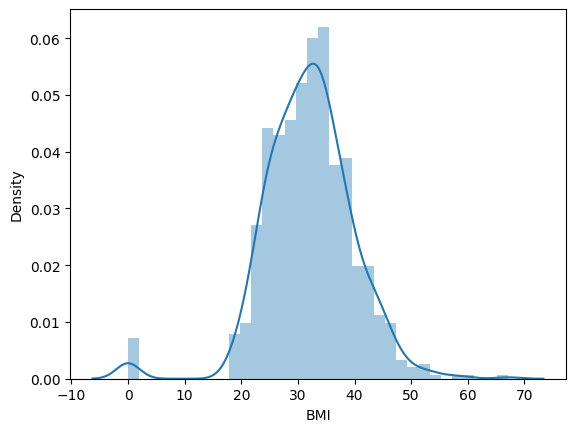

In [7]:
import matplotlib.pyplot as plt
from scipy import stats

bmi = diabetes_df['BMI']
sns.distplot(bmi)

Besides from analyzing the distribution of our underlying data, one can also determine normal distribution through the Shapiro Wilk test. A pvalue below 0.05 indicates, that the data is not normally distributed.

In [8]:
stats.shapiro(bmi)

ShapiroResult(statistic=0.9499893188476562, pvalue=1.840968936133282e-15)

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60459/3348447874.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weight)


<AxesSubplot: xlabel='Weight(Pounds)', ylabel='Density'>

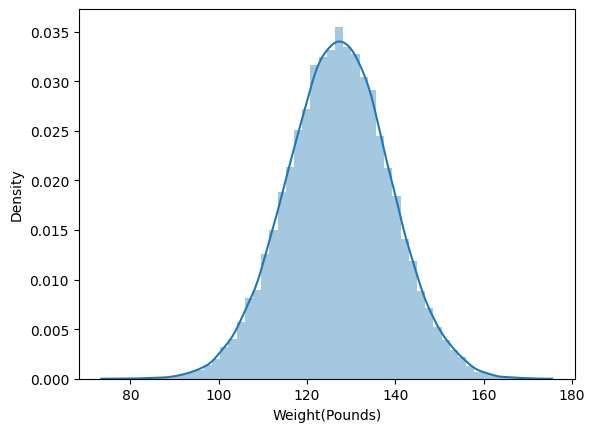

In [9]:
weight = weight_df['Weight(Pounds)']
sns.distplot(weight)

In [10]:
stats.shapiro(weight)

/Users/nicolasrehbach/miniforge3/envs/aml/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.999895453453064, pvalue=0.37611162662506104)

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60459/1451902263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(height)


<AxesSubplot: xlabel='Male Height in Cm', ylabel='Density'>

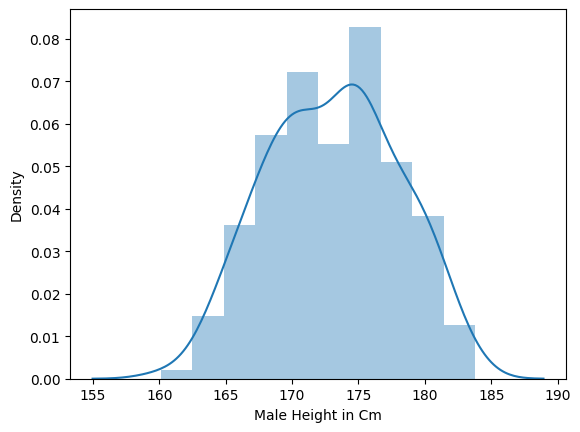

In [11]:
height = height_df['Male Height in Cm']
sns.distplot(height)

In [12]:
stats.shapiro(height)

ShapiroResult(statistic=0.9877829551696777, pvalue=0.08522681146860123)

Using the Shapiro Wilk Test, one can observe two pvalues over 0.05 (therefore standard deviated datasets) and one dataset with less than 0.05.

**6.** Compute the anomalies

Computing the anomalies by using the previously defined function.

In [13]:
bmiAnomalies = 0
for i in find_anomalies(bmi):
    bmiAnomalies = bmiAnomalies + 1
print('Total anomalies:', bmiAnomalies)

lower limit= 8.35550093
upper limit= 55.62965532
Total anomalies: 14


In [14]:
bmi.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [15]:
weightAnomalies = 0
for i in find_anomalies(weight):
    weightAnomalies = weightAnomalies + 1
print('Total anomalies:', weightAnomalies)

lower limit= 92.09742813
upper limit= 162.06141419
Total anomalies: 69


In [16]:
weight.describe()

count    25000.000000
mean       127.079421
std         11.660898
min         78.014760
25%        119.308675
50%        127.157750
75%        134.892850
max        170.924000
Name: Weight(Pounds), dtype: float64

In [17]:
heightAnomalies = 0
for i in find_anomalies(height):
    heightAnomalies = heightAnomalies + 1
print('Total anomalies:', heightAnomalies)

lower limit= 158.27690586
upper limit= 187.9011846
Total anomalies: 0


In [18]:
height.describe()

count    199.000000
mean     173.089045
std        4.949832
min      160.130000
25%      169.490000
50%      173.530000
75%      176.510000
max      183.780000
Name: Male Height in Cm, dtype: float64

For the BMI and weight datasets, we can observe the outliers at the upper and lower end of the extremes. The height has no anomalies with 158cm being the threshhold and a minimum value of 160. Also the upper end is not met with 187cm and a max of 184.

**7.** Visualize the anomalies

In [19]:
# creating an isAnomaly column, which is 1 for true
bmi_anomalies = pd.DataFrame(find_anomalies(bmi))
bmi_anomalies = bmi_anomalies.rename(columns={0: 'BMI'})
bmi_anomalies = bmi_anomalies.groupby('BMI').count()

bmi_anomalies['isAnomaly'] = 1

bmi_anomalies = bmi_anomalies.reset_index()

lower limit= 8.35550093
upper limit= 55.62965532


In [20]:
bmi = pd.DataFrame(bmi)
bmi['isAnomaly'] = 0

In [21]:
# loop through our data and compare the bmi to our threshholds
for i in range(0, len(bmi)):
    if bmi['BMI'][i] < 8.35 or bmi['BMI'][i] > 55.6:
        bmi['isAnomaly'][i] = 1

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60459/1213754561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi['isAnomaly'][i] = 1


<AxesSubplot: xlabel='BMI', ylabel='isAnomaly'>

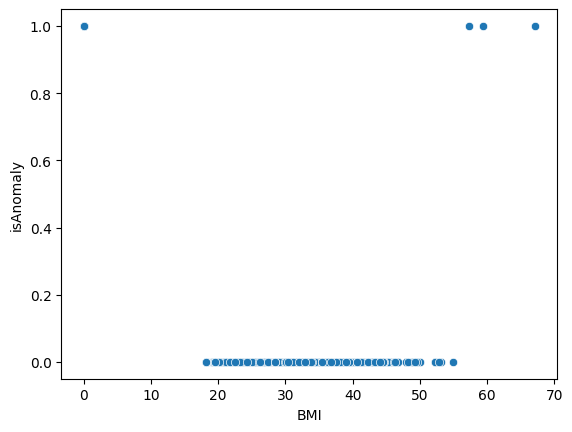

In [22]:
sns.scatterplot(data = bmi, x = 'BMI', y = 'isAnomaly')

In [23]:
# creating an isAnomaly column, which is 1 for true
weight_anomalies = pd.DataFrame(find_anomalies(weight))
weight_anomalies = weight_anomalies.rename(columns={0: 'weight'})
weight_anomalies = weight_anomalies.groupby('weight').count()

weight_anomalies['isAnomaly'] = 1

weight_anomalies = weight_anomalies.reset_index()

lower limit= 92.09742813
upper limit= 162.06141419


In [24]:
weight = pd.DataFrame(weight)
weight['isAnomaly'] = 0

In [25]:
for i in range(0, len(weight)):
    if weight['Weight(Pounds)'][i] < 92.09742813 or weight['Weight(Pounds)'][i] > 162.06141419:
        weight['isAnomaly'][i] = 1

/var/folders/vc/33g3tqwn4c59qnzswhnf6ry00000gn/T/ipykernel_60459/1208007569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight['isAnomaly'][i] = 1


<AxesSubplot: xlabel='Weight(Pounds)', ylabel='isAnomaly'>

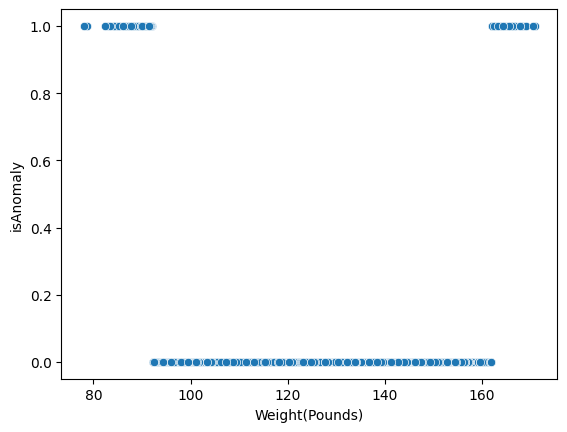

In [26]:
sns.scatterplot(data = weight, x = 'Weight(Pounds)', y = 'isAnomaly')

One can observe visually and by using the Shapiro Wilk test that two out of three datasets are normally distributed.
Visually, the outliers in the BMI dataset can be clearly seen. The other two datasets follow a relatively normal distribution.
By using the Shapiro Wilk test, we can reinforce the statement of normal distribution by analyzing the p-value. Since the p-value of dataset 2 and 3 are over 0.05 we can conclude a normal distribution. 

**8.** does the 0,3% rule apply?

In [27]:
print("bmi percentage:", bmiAnomalies/bmi.size)
print("weight percentage:", weightAnomalies / weight.size)
print("height percentage:", heightAnomalies/height.size)

bmi percentage: 0.009114583333333334
weight percentage: 0.00138
height percentage: 0.0


**What is the .3 % rule?**

99.7% of the observations lie within the third quartiles of the mean standard deviation.

The 0.3 percent rule applies for our datasets. The bmi dataset (non normal distributed) has a anomaly percentage of 0.9 percent. Our weight and height datasets come to 0.2 percent and 0 percent. 

**9.** What are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection?


We can observe, that the normally distributed datasets have far less or optimally no outliers. Additionally, one can observe the outliers visually in the non-normally distributed dataset and a higher amount of anomalies detected by the find_anomalies function.

**10.** Which statement can be made and which cannot?

Based on the standard deviation we can make general assumptions about our data but also about new data concerning the same variables. Additionally, the standard deviation is used for many ML algorithms e.g. the Linear Regression.

We can observe, that the weight and height in two datasets are normally distributed. One can conclude, that the humans included inside the dataset normally weight between 92 and 162 pounds. In terms of the height the normal male height is between 158 and 188cm according to the data. 

In terms of the bmi, the normal range lies between 8.4 and 55.6. In this case, the problem of using the standard deviation to analyze anomalies can be detected. A BMI of 8.4 can not exist, however without domain knowledge wrong statements could be made based on the standard deviation. 